# Quick look at data

In [ ]:
# Imports

# Core Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

# Preprocessing & Model Selection
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics & Evaluation
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
data.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [ ]:
data.isna().any()

,0
Diabetes,False
HighBP,False
HighChol,False
BMI,False
Smoker,False
Stroke,False
Myocardial,False
PhysActivity,False
Fruit,False
Vegetables,False


## Correlation

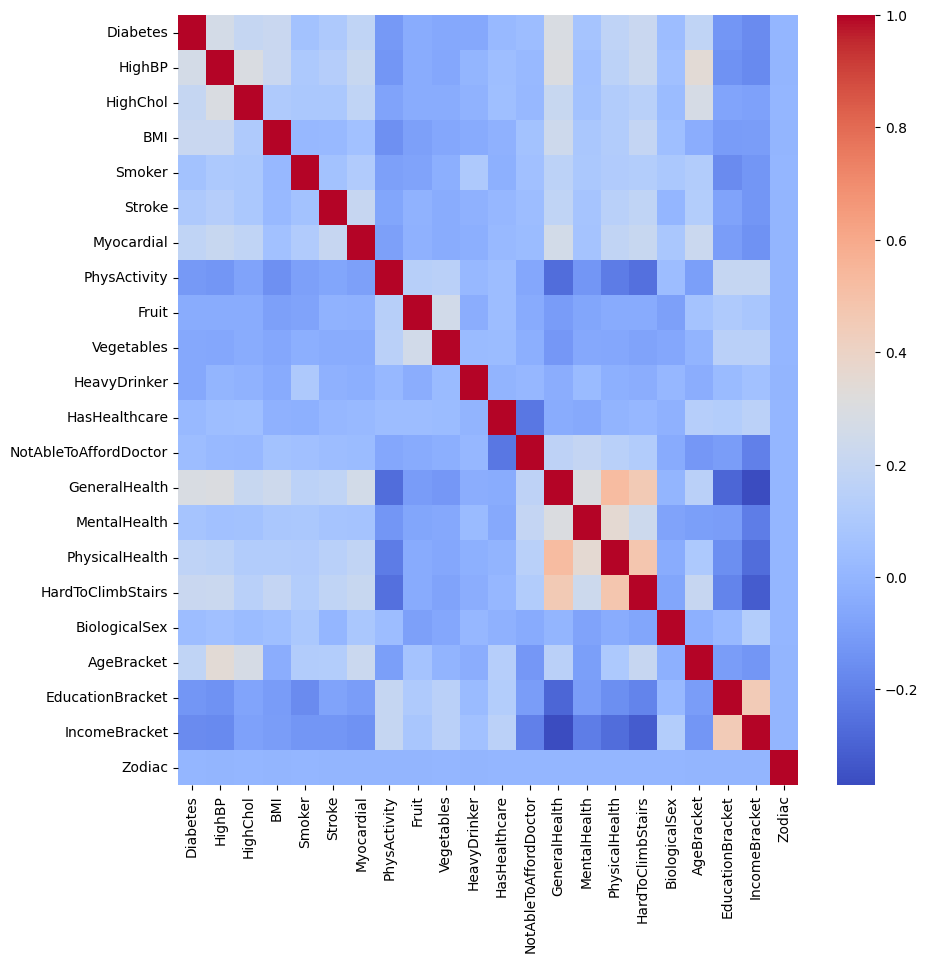

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=False,cmap='coolwarm')
plt.show()

In [ ]:
def check_corr(feature1, feature2):
  corr_arr = np.corrcoef(data[feature1],data[feature2])
  return corr_arr[0,1]

def print_corr(feature1, feature2):
  corr_arr = np.corrcoef(data[feature1],data[feature2])
  print(f"Correlation of {feature1} and {feature2} : {corr_arr[0,1]}")

In [ ]:
for i in range(len(data.columns)):
  for j in range(i+1,len(data.columns)):
    if check_corr(data.columns[i],data.columns[j]) >= 0.4:
      print_corr(data.columns[i],data.columns[j])

Correlation of GeneralHealth and PhysicalHealth : 0.5243636438493411
Correlation of GeneralHealth and HardToClimbStairs : 0.45691950252803437
Correlation of PhysicalHealth and HardToClimbStairs : 0.47841661925623324
Correlation of EducationBracket and IncomeBracket : 0.4491064244456052


## Visualization

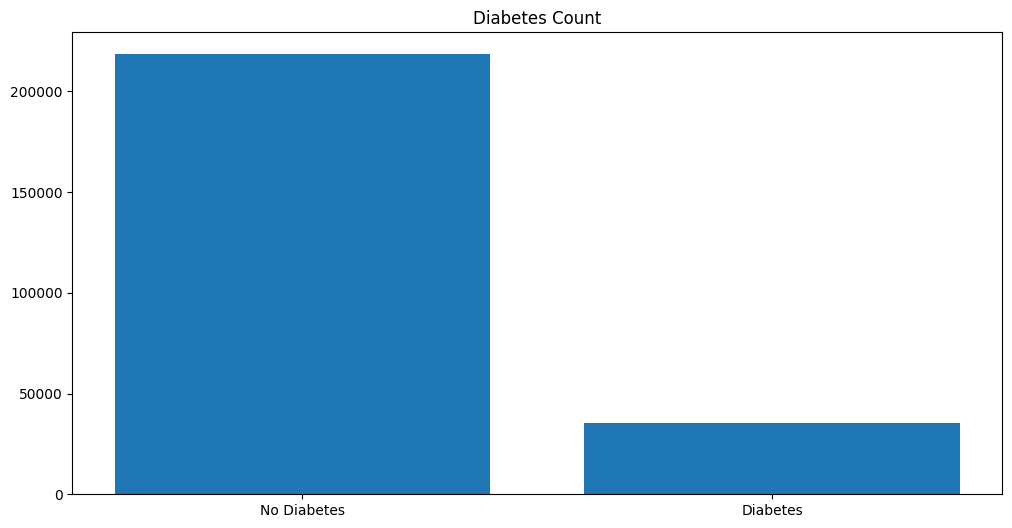

In [ ]:
# @title
plt.figure(figsize=(12,6))
plt.bar([0,1],data['Diabetes'].value_counts())
plt.xticks([0,1],['No Diabetes','Diabetes'])
plt.title("Diabetes Count")
plt.savefig("diabetes_count.png", dpi=300, bbox_inches='tight')
plt.show()

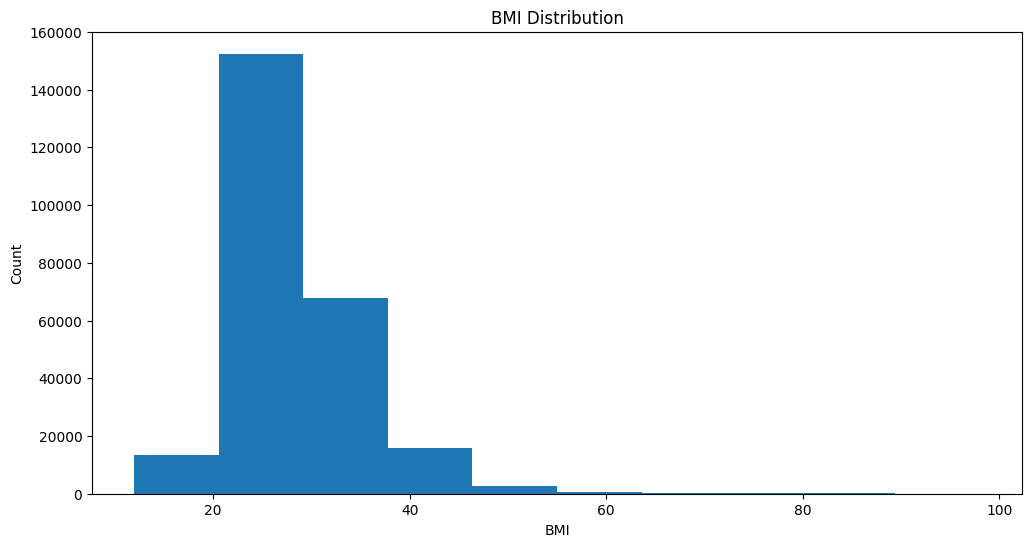

In [ ]:
# @title
plt.figure(figsize=(12,6))
plt.hist(data['BMI'])
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

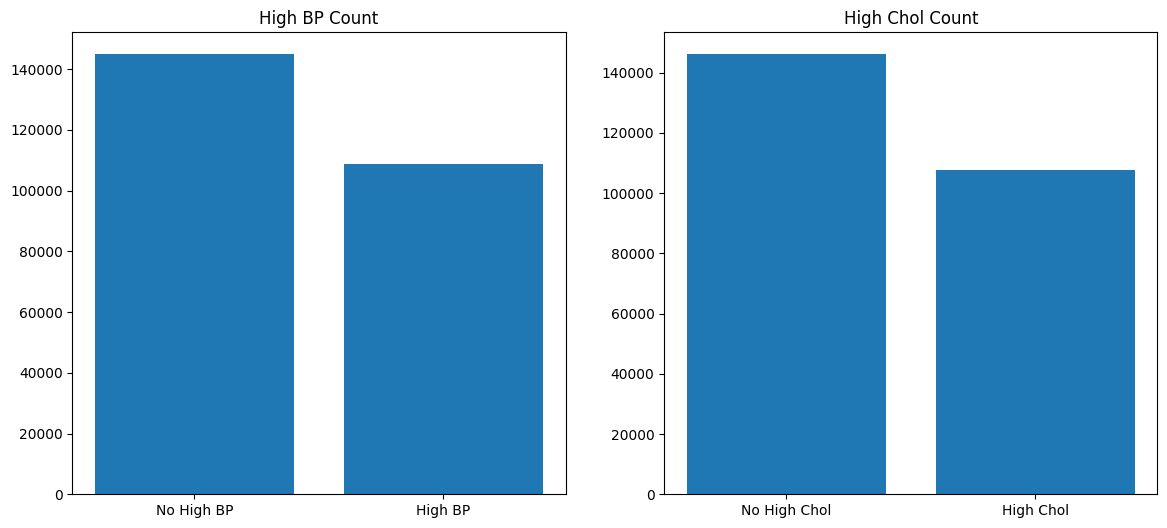

In [ ]:
# @title
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].bar([0,1], data['HighBP'].value_counts())
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['No High BP','High BP'])
axes[0].set_title("High BP Count")

axes[1].bar([0,1], data['HighChol'].value_counts())
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['No High Chol','High Chol'])
axes[1].set_title("High Chol Count")

plt.show()

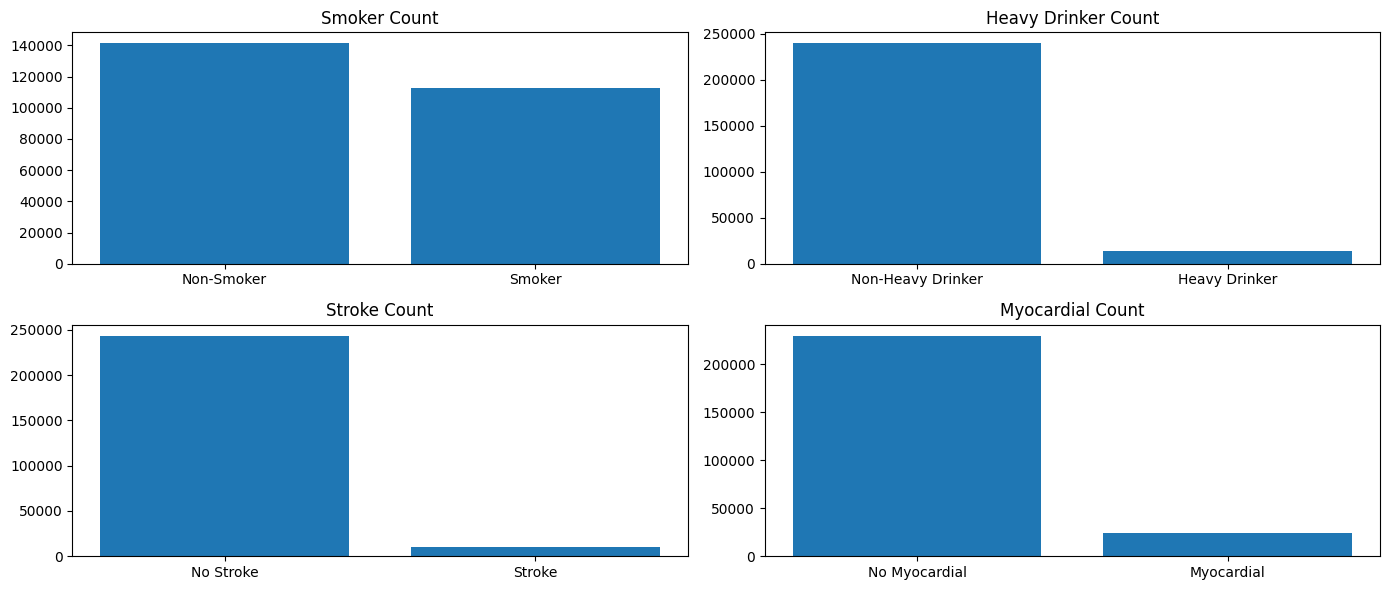

In [ ]:
# @title
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Smoker
axes[0,0].bar([0,1], data['Smoker'].value_counts())
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(['Non-Smoker','Smoker'])
axes[0,0].set_title("Smoker Count")

# Heavy Drinker
axes[0,1].bar([0,1], data['HeavyDrinker'].value_counts())
axes[0,1].set_xticks([0,1])
axes[0,1].set_xticklabels(['Non-Heavy Drinker','Heavy Drinker'])
axes[0,1].set_title("Heavy Drinker Count")

# Stroke
axes[1,0].bar([0,1], data['Stroke'].value_counts())
axes[1,0].set_xticks([0,1])
axes[1,0].set_xticklabels(['No Stroke','Stroke'])
axes[1,0].set_title("Stroke Count")

# Myocardial
axes[1,1].bar([0,1], data['Myocardial'].value_counts())
axes[1,1].set_xticks([0,1])
axes[1,1].set_title("Myocardial Count")
axes[1,1].set_xticklabels(['No Myocardial','Myocardial'])

plt.tight_layout()

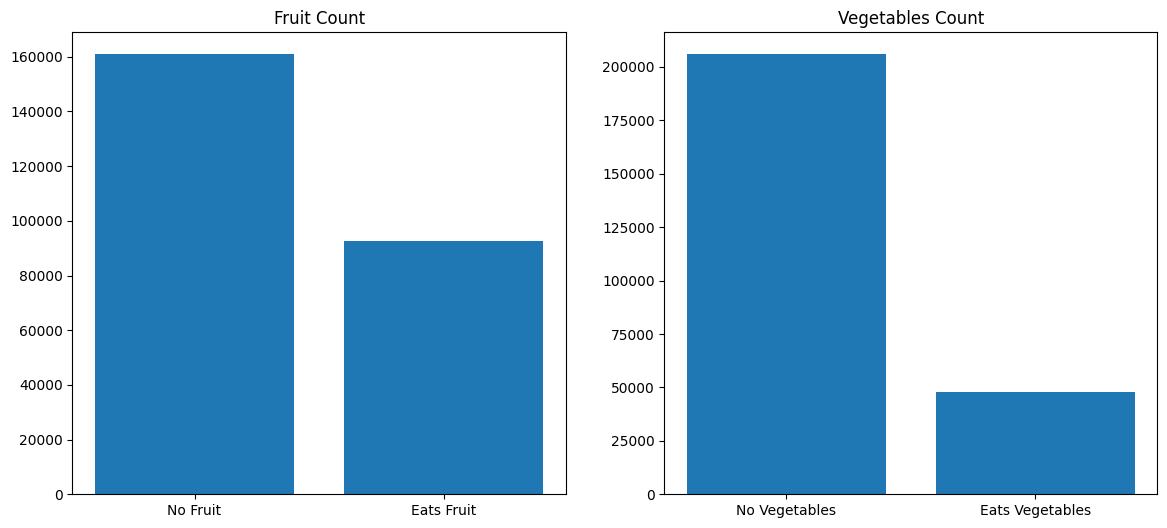

In [ ]:
# @title
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].bar([0,1], data['Fruit'].value_counts())
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['No Fruit','Eats Fruit'])
axes[0].set_title("Fruit Count")

axes[1].bar([0,1], data['Vegetables'].value_counts())
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['No Vegetables','Eats Vegetables'])
axes[1].set_title("Vegetables Count")

plt.show()

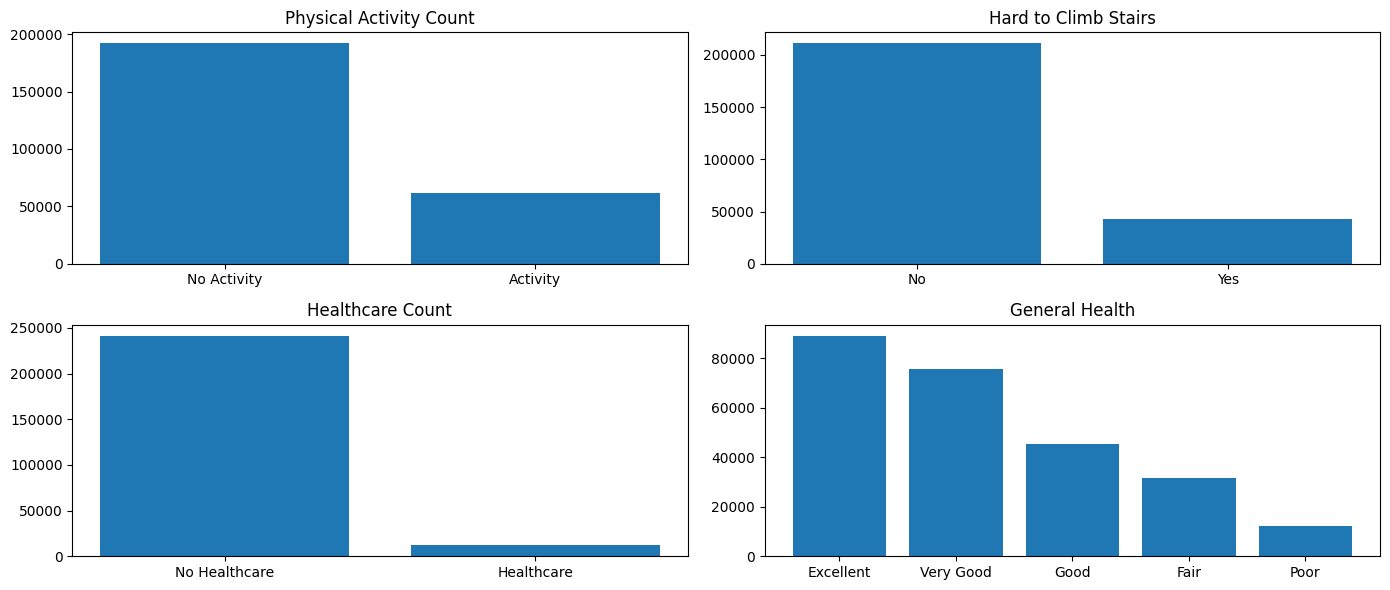

In [ ]:
# @title
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

axes[0,0].bar([0,1], data['PhysActivity'].value_counts())
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(['No Activity','Activity'])
axes[0,0].set_title("Physical Activity Count")

axes[0,1].bar([0,1], data['HardToClimbStairs'].value_counts())
axes[0,1].set_xticks([0,1])
axes[0,1].set_xticklabels(['No','Yes'])
axes[0,1].set_title("Hard to Climb Stairs")

axes[1,0].bar([0,1], data['HasHealthcare'].value_counts())
axes[1,0].set_xticks([0,1])
axes[1,0].set_xticklabels(['No Healthcare','Healthcare'])
axes[1,0].set_title("Healthcare Count")

axes[1,1].bar([1,2,3,4,5],data['GeneralHealth'].value_counts())
axes[1,1].set_xticks([1,2,3,4,5])
axes[1,1].set_xticklabels(['Excellent','Very Good','Good','Fair','Poor'])
axes[1,1].set_title("General Health")

plt.tight_layout()
plt.show()


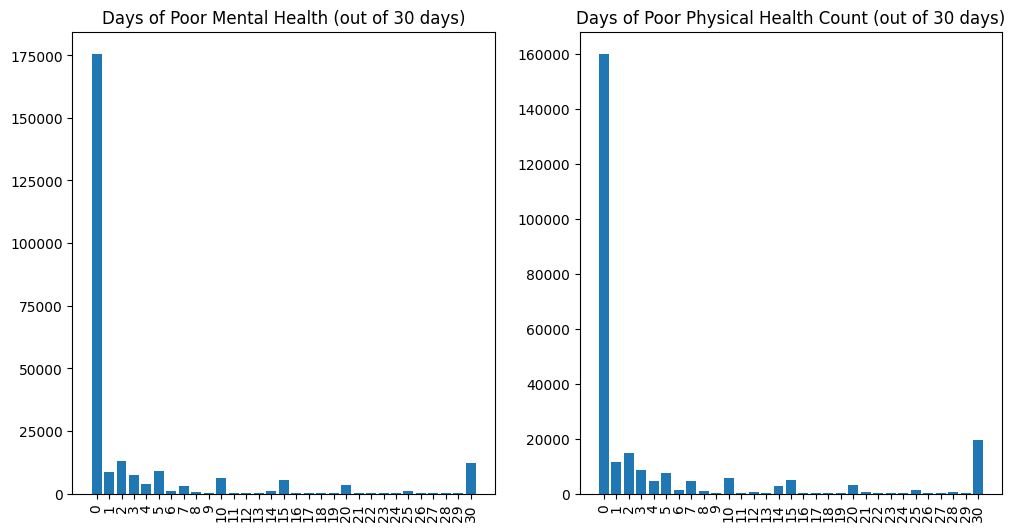

In [ ]:
# @title

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
mental_health_counts = data['MentalHealth'].value_counts().sort_index()
axes[0].bar(mental_health_counts.index, mental_health_counts.values)
axes[0].set_title("Days of Poor Mental Health (out of 30 days)")
axes[0].set_xticks(mental_health_counts.index)
axes[0].set_xticklabels(mental_health_counts.index, rotation=90)

phys_health_counts = data['PhysicalHealth'].value_counts().sort_index()
axes[1].bar(phys_health_counts.index, phys_health_counts.values)
axes[1].set_xticks(phys_health_counts.index)
axes[1].set_xticklabels(phys_health_counts.index, rotation=90)
axes[1].set_title("Days of Poor Physical Health Count (out of 30 days)")

plt.show()


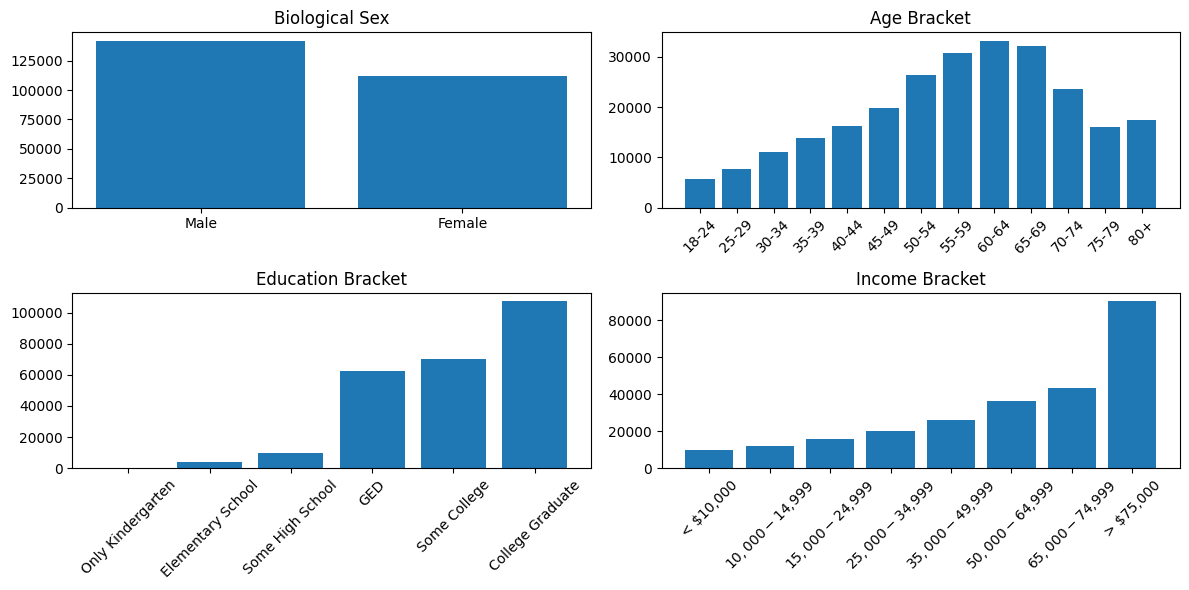

In [ ]:
# @title
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
 # Sex
axes[0,0].bar([1,2], data['BiologicalSex'].value_counts())
axes[0,0].set_xticks([1,2])
axes[0,0].set_xticklabels(['Male','Female'])
axes[0,0].set_title("Biological Sex")

# Age
age_counts = data['AgeBracket'].value_counts().sort_index()
age_group_mapping = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

axes[0,1].bar(age_counts.index, age_counts.values)
axes[0,1].set_xticks(age_counts.index)
axes[0,1].set_xticklabels(age_counts.index.map(age_group_mapping), rotation=45)
axes[0,1].set_title("Age Bracket")

# Education

education_mapping = {
    1: 'Only Kindergarten',
    2: 'Elementary School',
    3: 'Some High School',
    4: 'GED',
    5: 'Some College',
    6: 'College Graduate'
}

education_counts = data['EducationBracket'].value_counts().sort_index()
axes[1,0].bar(education_counts.index, education_counts.values)
axes[1,0].set_xticks(education_counts.index)
axes[1,0].set_xticklabels(education_counts.index.map(education_mapping), rotation=45)
axes[1,0].set_title("Education Bracket")


# Income
income_group_mapping = {
    1: '< $10,000',
    2: '$10,000 - $14,999',
    3: '$15,000 - $24,999',
    4: '$25,000 - $34,999',
    5: '$35,000 - $49,999',
    6: '$50,000 - $64,999',
    7: '$65,000 - $74,999',
    8: '> $75,000'
}

income_counts = data['IncomeBracket'].value_counts().sort_index()
axes[1,1].bar(income_counts.index, income_counts.values)
axes[1,1].set_xticks(income_counts.index)
axes[1,1].set_xticklabels(income_counts.index.map(income_group_mapping), rotation=45)
axes[1,1].set_title("Income Bracket")


plt.tight_layout()
plt.show()

## Other

In [ ]:
pd.crosstab(data['HasHealthcare'], data['NotAbleToAffordDoctor'], values=data['Diabetes'], aggfunc='mean')


NotAbleToAffordDoctor,0,1
HasHealthcare,,
0,0.102450,0.135182
1,0.137206,0.186170


In [ ]:
# Compare avg BMI and HighBP rates across GeneralHealth levels
data.groupby('GeneralHealth')[['BMI', 'HighBP']].agg(['mean', 'std'])


BMI              HighBP          
                    mean       std      mean       std
GeneralHealth                                         
1              25.766617  5.126241  0.201969  0.401474
2              27.642225  5.785871  0.357539  0.479278
3              29.510100  6.693782  0.514396  0.499796
4              30.685144  7.840014  0.650713  0.476752
5              30.569075  8.616751  0.693155  0.461204

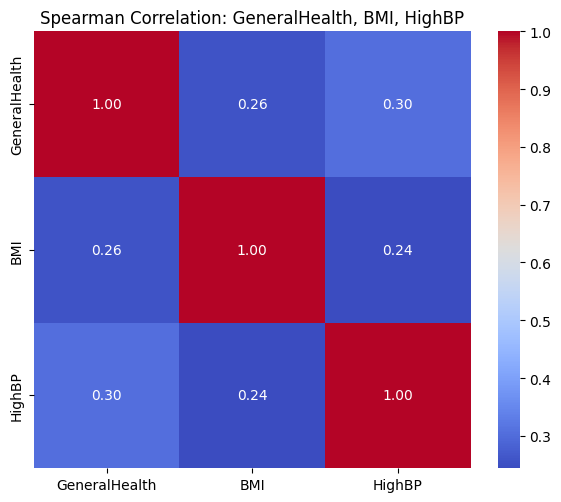

In [ ]:
# Calculate Spearman correlation matrix
spearman_corr = data[['GeneralHealth', 'BMI', 'HighBP']].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Spearman Correlation: GeneralHealth, BMI, HighBP')
plt.tight_layout()
plt.show()


# Models

In [ ]:
df = pd.read_csv("diabetes.csv") # loading data here

In [ ]:
print(df.isna().sum()) # double checking for any nan values

Diabetes                 0
HighBP                   0
HighChol                 0
BMI                      0
Smoker                   0
Stroke                   0
Myocardial               0
PhysActivity             0
Fruit                    0
Vegetables               0
HeavyDrinker             0
HasHealthcare            0
NotAbleToAffordDoctor    0
GeneralHealth            0
MentalHealth             0
PhysicalHealth           0
HardToClimbStairs        0
BiologicalSex            0
AgeBracket               0
EducationBracket         0
IncomeBracket            0
Zodiac                   0
dtype: int64


In [ ]:
df.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
       'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
       'AgeBracket', 'EducationBracket', 'IncomeBracket', 'Zodiac'],
      dtype='object')

In [ ]:
# need to do a little one-hot encoding for Zodiac
categorical_columns = ["Zodiac"]
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded["BiologicalSex"] = df_encoded["BiologicalSex"].map({1: 0, 2: 1}) # also just want to map sex to binary

In [ ]:
df_encoded.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,Zodiac_3,Zodiac_4,Zodiac_5,Zodiac_6,Zodiac_7,Zodiac_8,Zodiac_9,Zodiac_10,Zodiac_11,Zodiac_12
0,0,1,1,40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,25,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,28,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,27,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,24,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X = df_encoded.drop('Diabetes', axis=1)
y = df_encoded['Diabetes']

In [ ]:
X = X.values # convert to numpy
y = y.values # convert to numpy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# @title
'''
 initially just did with numpy because I forgot to do hot-encoding
data = np.genfromtxt('diabetes.csv', delimiter=',')
print(data)
data = data[1:, :] # exclude the first row = names/headers
print("\n")
print(data)


# Double hecking for NaN values
if (np.isnan(data).any()):
  print(f"NaN values found: {np.isnan(data).sum()}")
  print(f"Locations of NaN values: {np.argwhere(np.isnan(data))}")

X, y = data[:,1:], data[:,:1] # diabetes condition is going to be predicted here
print(X.shape)
print(y.shape)
y = y.flatten()
'''

## Logistic regression model

In [ ]:
# @title
# Function to plot ROC and get AUC scores

def plot_roc_auc(X_test, lr_model, title="ROC Curve"):
  y_prob = lr_model.predict_proba(X_test)[:, 1]  # predicted probabilities for the positive class (1)
  fpr, tpr, _ = roc_curve(y_test, y_prob) # ROC curve
  auc_score = roc_auc_score(y_test, y_prob) # AUC score
  plt.figure(figsize=(12, 8))
  plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend()
  plt.show()
  return auc_score # did this so that I could make a lists of the AUC scores later when trying to determine most impactful feature


In [ ]:
# @title
lr_model = LogisticRegression(max_iter=1000, solver='liblinear') # initial model with full dataset
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = lr_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8630


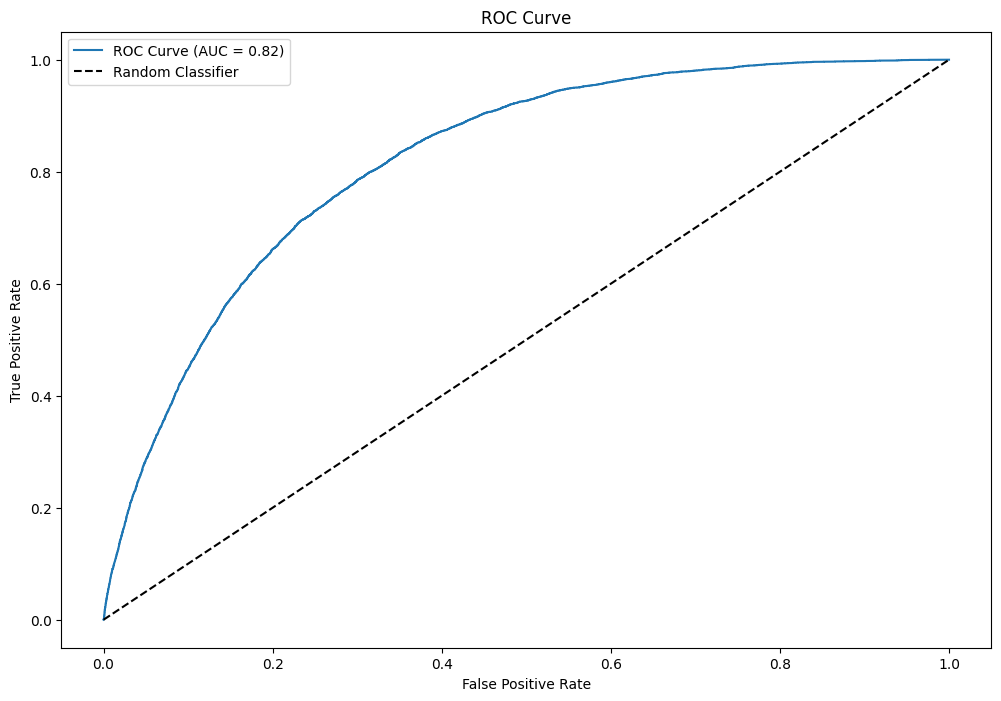

In [ ]:
# @title
inital_auc = plot_roc_auc(X_test, lr_model)

In [ ]:
# @title
# Determining the best predictor
auc_scores = []
for i in range(X_train.shape[1]):
  cur_X = np.delete(X_train,i,axis=1) # drops feature with index i
  cur_y = y_train
  cur_lr_model = LogisticRegression(max_iter=1000, solver='liblinear')
  cur_lr_model.fit(cur_X, cur_y)
  cur_X_test = np.delete(X_test,i,axis=1)

  y_prob = cur_lr_model.predict_proba(cur_X_test)[:, 1]  # predicted probabilities for the positive class (1)
  fpr, tpr, _ = roc_curve(y_test, y_prob) # ROC curve
  auc_score = roc_auc_score(y_test, y_prob) # AUC score

  auc_scores.append(auc_score)

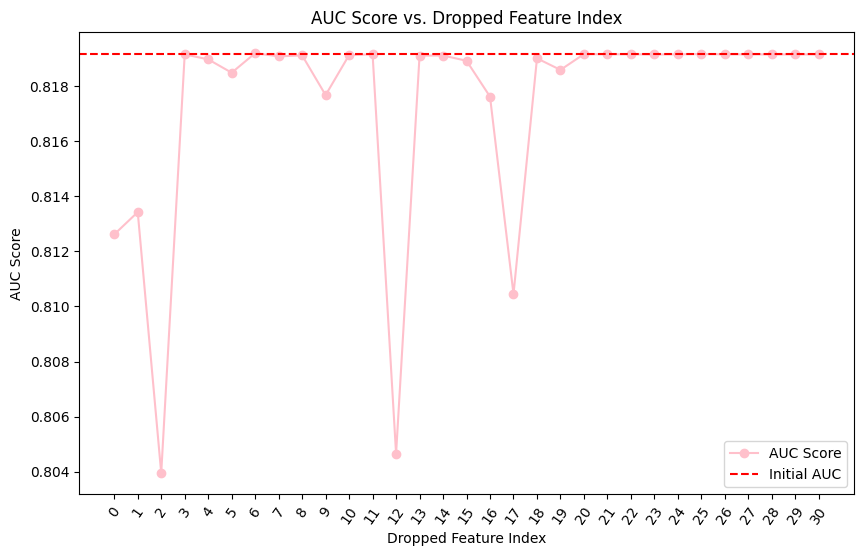

In [ ]:
# @title
# Not super big difference looking at the ROC curves
# Decided to plot AUC score to see how it changes with the features being dropped
plt.figure(figsize=(10, 6))
indices = list(range(len(auc_scores)))
plt.plot(indices, auc_scores, marker='o', linestyle='-', color='pink', label='AUC Score')
plt.axhline(y=inital_auc, color='red', linestyle='--', linewidth=1.5, label='Initial AUC')
plt.xticks(indices)
plt.xlabel("Dropped Feature Index")
plt.xticks(rotation=55)
plt.ylabel("AUC Score")
plt.title("AUC Score vs. Dropped Feature Index")
plt.legend()
plt.show()

## Support Vector Machine

### Choosing optimal C-value

In [ ]:
#
C_values = [1e-7,1e-6,1e-5,1e-4, 0.001, 0.01, 0.1, 1, 10, 100]
scores = [] #f1-scores
accuracies = []
auc_scores = []

for C in C_values:
    model = LinearSVC(C=C, max_iter=10000, dual=False, random_state=13)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='f1')) # initially was going to use CV to choose C according to f1-score
    scores.append(cv_score)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    y_scores = model.decision_function(X_test) # decision function
    fpr, tpr, _ = roc_curve(y_test, y_scores) # roc
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score) #auc scores


In [ ]:
C_df = pd.DataFrame({'C': C_values, 'F1-Score': scores, 'Accuracy': accuracies, 'AUC Score': auc_scores})
C_df

,C,F1-Score,Accuracy,AUC Score
0,1.000000e-07,0.415240,0.813407,0.800252
1,1.000000e-06,0.377006,0.847327,0.807423
2,1.000000e-05,0.161620,0.863194,0.815262
3,1.000000e-04,0.109579,0.862938,0.818925
4,1.000000e-03,0.118095,0.863056,0.819491
5,1.000000e-02,0.119776,0.863154,0.819542
6,1.000000e-01,0.120007,0.863154,0.819546
7,1.000000e+00,0.120007,0.863154,0.819547
8,1.000000e+01,0.120007,0.863154,0.819547
9,1.000000e+02,0.120007,0.863154,0.819547


### SVM Model

In [ ]:
# @title
# actual model
svm_model = LinearSVC(C=1e-6, max_iter=10000, random_state=13, dual=False)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

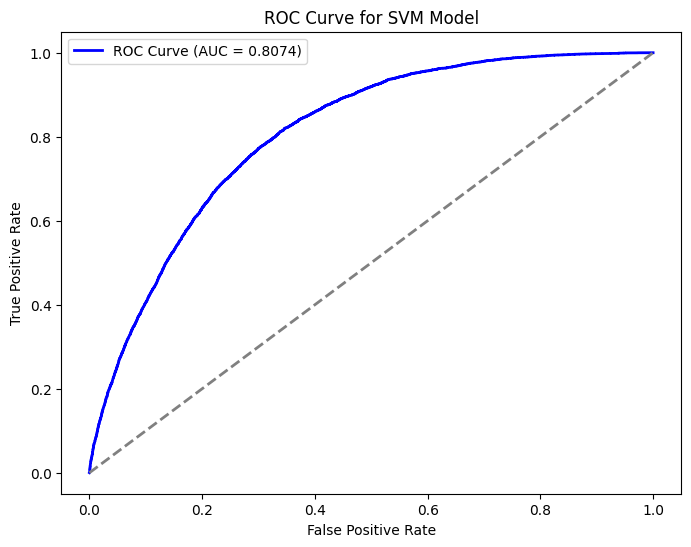

Accuracy: 0.8473


In [ ]:
# @title
# Get decision function scores (needed for ROC curve)
y_scores = svm_model.decision_function(X_test)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal baseline

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend()
plt.show()

print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# @title
# Determining the best predictor
auc_scores = [] # saving their auc scores here

for i in range(X_train.shape[1]):
  cur_X = np.delete(X_train,i,axis=1) # drops feature with index i
  cur_y = y_train
  cur_svm_model = LinearSVC(C=1e-6, max_iter=10000, random_state=13, dual=False)
  cur_svm_model.fit(cur_X, cur_y)
  cur_X_test = np.delete(X_test,i,axis=1)
  cur_y_test = y_test
  # ROC curve and AUC score
  cur_y_scores = cur_svm_model.decision_function(cur_X_test)

  # Compute ROC curve and AUC score
  fpr, tpr, _ = roc_curve(cur_y_test, cur_y_scores)  # False Positive Rate, True Positive Rate
  roc_auc = auc(fpr, tpr)  # Compute AUC
  auc_scores.append(roc_auc) # save to list of auc scores

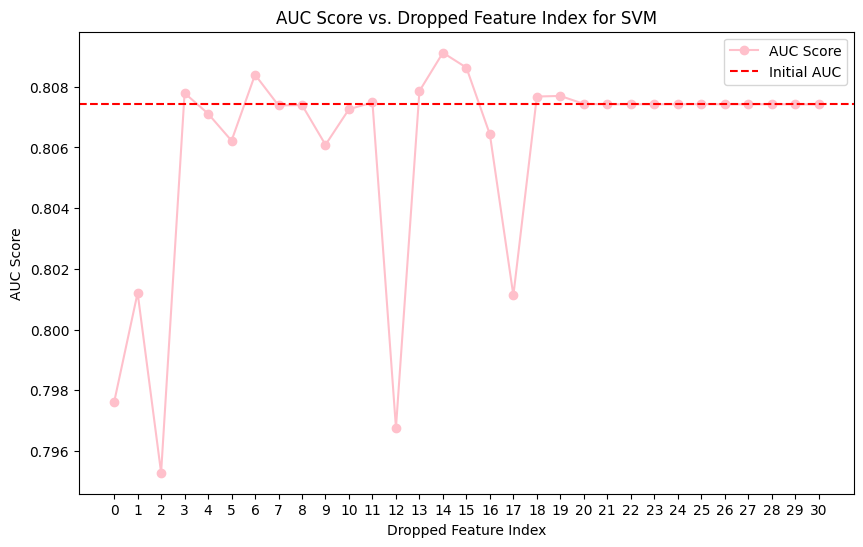

In [ ]:
# @title
# Decided to plot AUC score to see how it changes with the features being dropped

initial_auc = C_df.iloc[1,3]

plt.figure(figsize=(10, 6))
indices = list(range(len(auc_scores)))
plt.plot(indices, auc_scores, marker='o', linestyle='-', color='pink', label='AUC Score')
plt.axhline(y=initial_auc, color='red', linestyle='--', linewidth=1.5, label='Initial AUC')
plt.xticks(indices)
plt.xlabel("Dropped Feature Index")
plt.ylabel("AUC Score")
plt.title("AUC Score vs. Dropped Feature Index for SVM")
plt.legend()
plt.show()

In [ ]:
# @title
col_names = []
for i in df_encoded.columns:
  if(i!='Diabetes'):
    col_names.append(i)

In [ ]:
# @title
# Get feature importance (absolute values of coefficients)
feature_importance = np.abs(svm_model.coef_).flatten()
feature_names = [f"Feature {i}" for i in range(X.shape[1])]
importance_df = pd.DataFrame({'Feature': col_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                  Feature  Importance
12          GeneralHealth    0.038437
0                  HighBP    0.036517
2                     BMI    0.033747
1                HighChol    0.027238
15      HardToClimbStairs    0.024318
17             AgeBracket    0.023141
5              Myocardial    0.021987
19          IncomeBracket    0.017085
14         PhysicalHealth    0.015920
18       EducationBracket    0.011434
4                  Stroke    0.011233
6            PhysActivity    0.011123
9            HeavyDrinker    0.009221
16          BiologicalSex    0.005646
8              Vegetables    0.004682
3                  Smoker    0.004130
10          HasHealthcare    0.003617
13           MentalHealth    0.003599
7                   Fruit    0.003115
11  NotAbleToAffordDoctor    0.001075
25               Zodiac_7    0.000889
30              Zodiac_12    0.000541
20               Zodiac_2    0.000478
23               Zodiac_5    0.000379
24               Zodiac_6    0.000323
22          

In [ ]:
# @title
def single_SVM(feature_index):
  X_train_feature = X_train[:,feature_index:feature_index+1]
  X_test_feature = X_test[:,feature_index:feature_index+1]
  svm_model = LinearSVC(C=1e-6, max_iter=10000, random_state=13, dual=False)
  svm_model.fit(X_train_feature, y_train)
  y_pred = svm_model.predict(X_test_feature)
  y_scores = svm_model.decision_function(X_test_feature)
  fpr, tpr, _ = roc_curve(y_test, y_scores)  # False Positive Rate, True Positive Rate
  roc_auc = auc(fpr, tpr)  # Compute AUC
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")
  print(f"AUC Score: {roc_auc:.4f}")

for i in[0,2,12]:
  print(f"{col_names[i]} as Predictor")
  single_SVM(i)
  print(f"Importance: {feature_importance[i]:4f}")
  print("\n")


HighBP as Predictor
Accuracy: 0.8602
AUC Score: 0.6849
Importance: 0.036517


BMI as Predictor
Accuracy: 0.8588
AUC Score: 0.6867
Importance: 0.033747


GeneralHealth as Predictor
Accuracy: 0.8602
AUC Score: 0.7271
Importance: 0.038437




## Single, individual decision tree

In [ ]:
# @title
# simple decision tree classifier with splitting using entropy criterion (imbalanced classes)
clf = DecisionTreeClassifier(criterion='entropy',random_state=13)
clf = clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(f"Accuracy: {np.sum(preds == y_test)/len(preds)}")

auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) #auc score

print(f"AUC score: {auc_score}")

Accuracy: 0.7985454115421002
AUC score: 0.5982403136910296


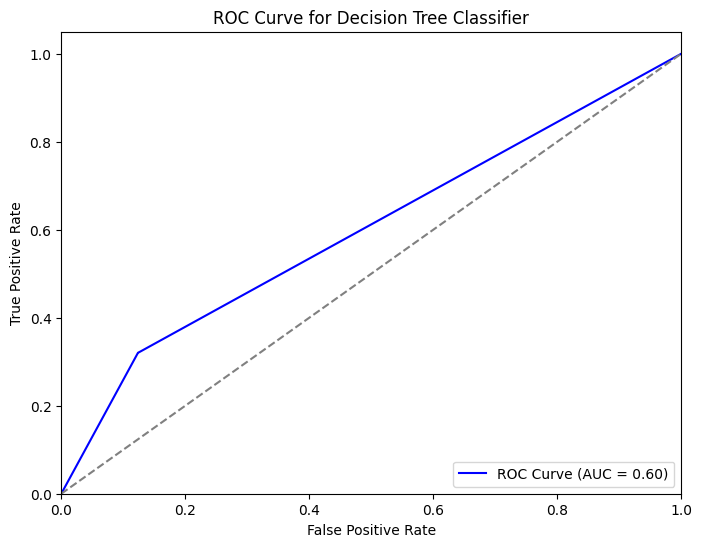

In [ ]:
# @title
y_scores = clf.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test,y_scores)
roc_auc = auc_score

# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# @title
feature_names = []
for i in df.columns:
  if(i!='Diabetes'):
    feature_names.append(i)

In [ ]:
# @title
root_feature_index = clf.tree_.feature[0]  # Get index of root node split feature
root_feature = feature_names[root_feature_index]
print(f"First split (root node) is on feature: {root_feature}")

First split (root node) is on feature: HighBP


In [ ]:
# @title

# Looks like overfitting to me...
print(f"Train AUC: {roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]):.4f}")
print(f"Test AUC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]):.4f}")

Train AUC: 1.0000
Test AUC: 0.5982


In [ ]:
# @title
# Ok, definitely need to do some quick hyperparameter tuning
# Used RandomSearch as to be faster - not completely exhaustive

#  hyperparameter distributions
param_dist = {
    "max_depth": np.arange(3, 20, 2),  #  depths from 3 to 19 (odd numbers)
    "min_samples_split": np.arange(2, 30, 2),  # split only when at least 2-30 samples exist
    "min_samples_leaf": np.arange(1, 20, 2),  # leaf nodes must have at least 1-19 samples
    "criterion": ["gini", "entropy"]  # test both impurity criteria
}

# model set up
tree = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(tree, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring="roc_auc",
                                   n_jobs=-1, verbose=1, random_state=42)

random_search.fit(X_train, y_train) #  randomized search
best_tree = random_search.best_estimator_ # get best model
test_auc = roc_auc_score(y_test, best_tree.predict_proba(X_test)[:, 1]) # look at test set auc
print(f"Best Parameters: {random_search.best_params_}")
print(f"Test AUC with Best Parameters: {test_auc:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'min_samples_split': np.int64(18), 'min_samples_leaf': np.int64(7), 'max_depth': np.int64(7), 'criterion': 'gini'}
Test AUC with Best Parameters: 0.8113


In [ ]:
# @title
# adjusted simple decision tree
tuned_clf = DecisionTreeClassifier(criterion='gini',
                                  min_samples_split=18,
                                  min_samples_leaf=7,
                                  max_depth=7,
                                  random_state=13)
tuned_clf = tuned_clf.fit(X_train, y_train)

# adjusted prediction
tuned_preds = tuned_clf.predict(X_test)
print(f"Accuracy: {np.sum(tuned_preds == y_test)/len(tuned_preds)}")

# adjusted auc
tuned_auc_score = roc_auc_score(y_test, tuned_clf.predict_proba(X_test)[:, 1])

print(f"AUC score: {tuned_auc_score}")

Accuracy: 0.8641004415011038
AUC score: 0.8113471453110448


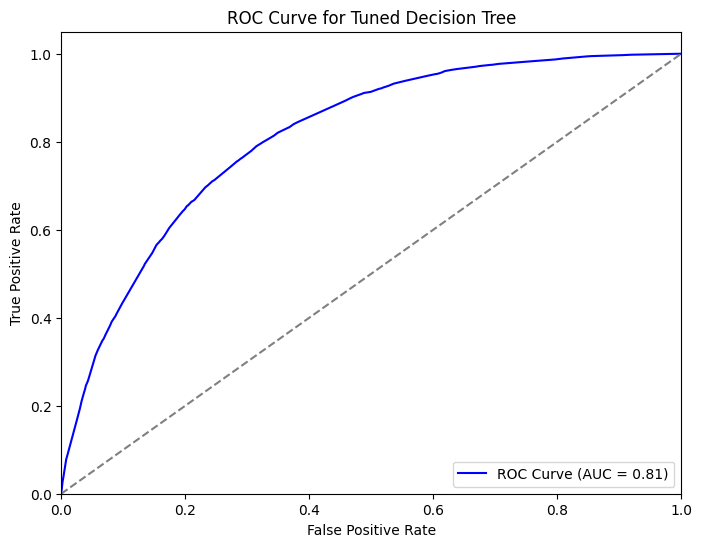

In [ ]:
# @title
y_scores = tuned_clf.predict_proba(X_test)[:, 1]  # probabilities for the positive class
# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test,y_scores)
roc_auc = tuned_auc_score
# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# @title
tuned_root_feature_index = tuned_clf.tree_.feature[0]  # Get index of root node split feature
tuned_root_feature = feature_names[tuned_root_feature_index]
print(f"First split (root node) is on feature: {tuned_root_feature}")

First split (root node) is on feature: HighBP


In [ ]:
# @title
tuned_auc_scores = [] # saving their auc scores here

for i in range(X_train.shape[1]):
  cur_X = np.delete(X_train,i,axis=1) # drops feature with index i
  cur_y = y_train
  cur_clf = DecisionTreeClassifier(criterion='gini',
                                  min_samples_split=18,
                                  min_samples_leaf=7,
                                  max_depth=7,
                                  random_state=13)
  cur_clf = cur_clf.fit(cur_X, cur_y)
  cur_X_test = np.delete(X_test,i,axis=1)

  auc_score = roc_auc_score(y_test, cur_clf.predict_proba(cur_X_test)[:, 1])
  tuned_auc_scores.append(auc_score)

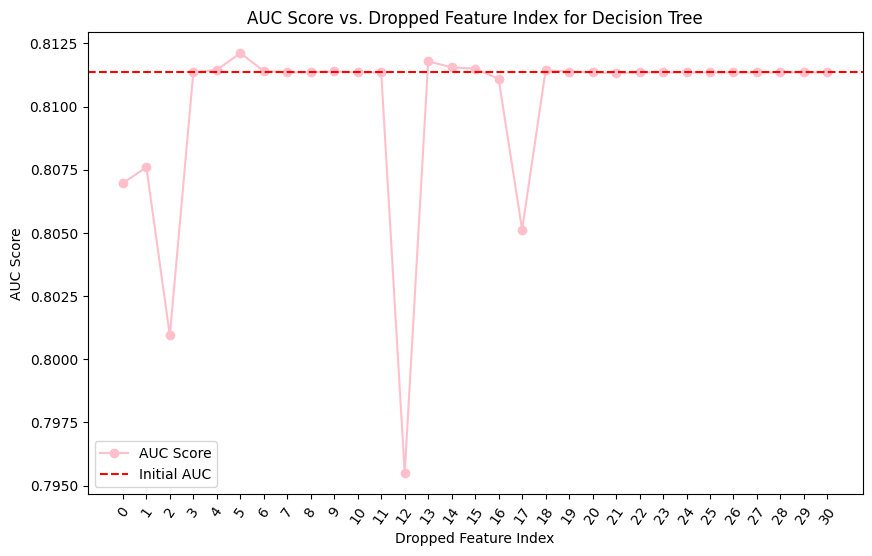

In [ ]:
# @title
initial_auc = tuned_auc_score
plt.figure(figsize=(10, 6))
indices = list(range(len(tuned_auc_scores)))
plt.plot(indices, tuned_auc_scores, marker='o', linestyle='-', color='pink', label='AUC Score')
plt.axhline(y=initial_auc, color='red', linestyle='--', linewidth=1.5, label='Initial AUC')
plt.xticks(indices)
plt.xticks(rotation=55)
plt.xlabel("Dropped Feature Index")
plt.ylabel("AUC Score")
plt.title("AUC Score vs. Dropped Feature Index for Decision Tree")
plt.legend()
plt.show()

In [ ]:
# @title
feature_importance = tuned_clf.feature_importances_
importance_df = pd.DataFrame({ # visualization
    'Importance': feature_importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False) #importance (descending)

## RandomForest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_samples=0.5, max_features=0.5,bootstrap=True, criterion='gini')
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, max_samples=0.5)

In [ ]:
# @title
preds = rf_model.predict(X_test) # make predictions
auc_score = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8058


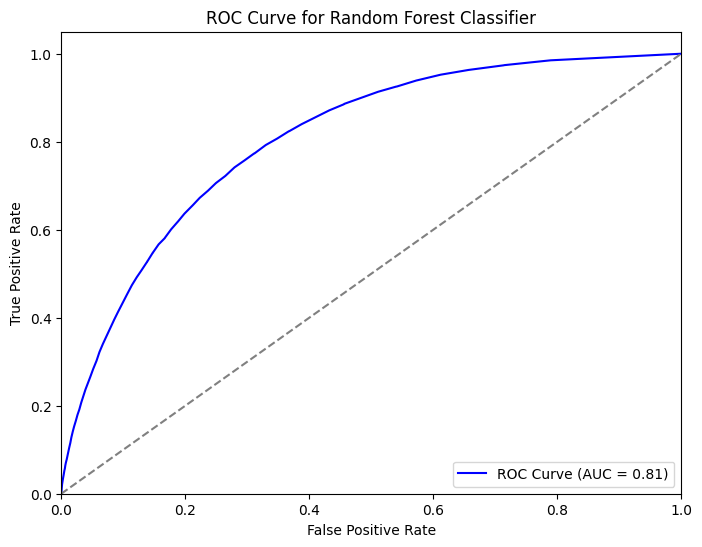

In [ ]:
# @title
y_scores = rf_model.predict_proba(X_test)[:, 1]  # probabilities for the positive class
# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test,y_scores)
roc_auc = auc_score
# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# @title
y_test_pred = rf_model.predict(X_test)
correct_predictions = sum(y_test_pred == y_test)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8625


In [ ]:
# @title
auc_scores = [] # saving their auc scores here

for i in range(X_train.shape[1]):
  cur_X = np.delete(X_train,i,axis=1) # drops feature with index i
  cur_y = y_train
  cur_clf = RandomForestClassifier(n_estimators=50, max_samples=0.5, max_features=0.5,bootstrap=True, criterion='gini', n_jobs=-1)
  cur_clf = cur_clf.fit(cur_X, cur_y)
  cur_X_test = np.delete(X_test,i,axis=1)

  auc_score = roc_auc_score(y_test, cur_clf.predict_proba(cur_X_test)[:, 1])
  auc_scores.append(auc_score)

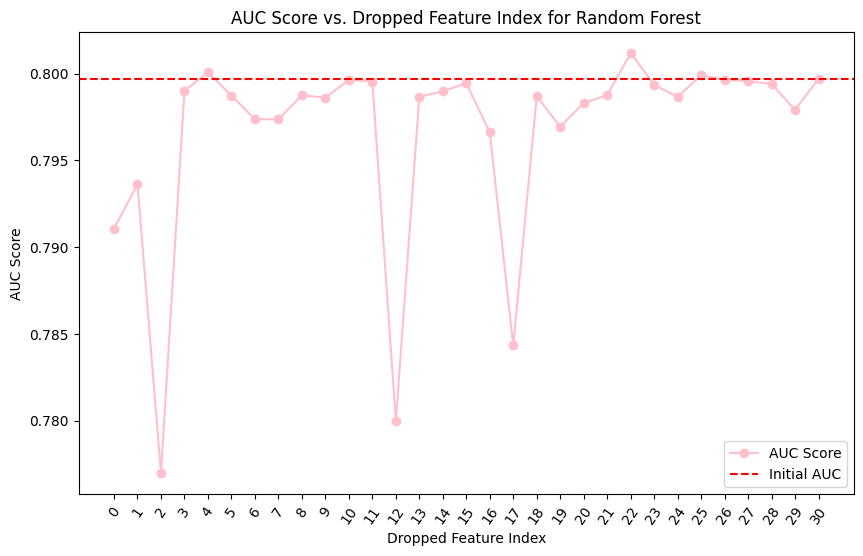

In [ ]:
# @title
initial_auc = auc_score
plt.figure(figsize=(10, 6))
indices = list(range(len(auc_scores)))
plt.plot(indices, auc_scores, marker='o', linestyle='-', color='pink', label='AUC Score')
plt.axhline(y=initial_auc, color='red', linestyle='--', linewidth=1.5, label='Initial AUC')
plt.xticks(indices)
plt.xticks(rotation=55)
plt.xlabel("Dropped Feature Index")
plt.ylabel("AUC Score")
plt.title("AUC Score vs. Dropped Feature Index for Random Forest")
plt.legend()
plt.show()

In [ ]:
# @title
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by="Importance", ascending=False) # sort by importance
print(importance_df.head(10))

    Importance
2     0.134138
17    0.090315
19    0.081578
14    0.068198
12    0.065660
18    0.059229
0     0.057595
13    0.052696
3     0.030097
7     0.029113


## AdaBoost

In [ ]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Weak learner (Decision Stump)
    algorithm="SAMME",
    n_estimators=100,  # boosting rounds
    learning_rate=1,
    random_state=13
)
bdt.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100, random_state=13)

In [ ]:
# @title
preds = bdt.predict(X_test)
print(f"Accuracy:{np.sum(preds == y_test)/len(preds):.4f}")
auc_score = roc_auc_score(y_test, bdt.predict_proba(X_test)[:, 1])
print(f"AUC Score: {auc_score:.4f}")

Accuracy:0.8634
AUC Score: 0.8220


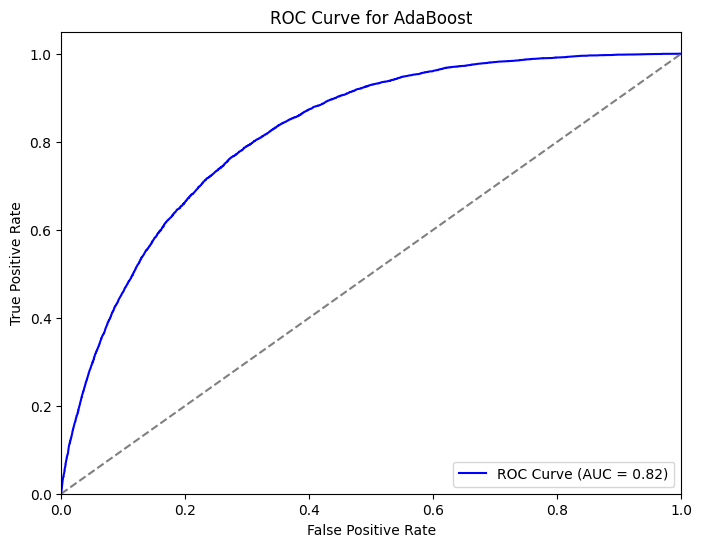

In [ ]:
# @title
y_scores = bdt.predict_proba(X_test)[:, 1]  # probabilities for the positive class
# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test,y_scores)
roc_auc = auc_score
# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# @title
auc_scores = [] # saving their auc scores here

for i in range(X_train.shape[1]):
  cur_X = np.delete(X_train,i,axis=1) # drops feature with index i
  cur_y = y_train
  cur_clf =  AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Weak learner (Decision Stump)
    algorithm="SAMME",
    n_estimators=100,  # boosting rounds
    learning_rate=1,
    random_state=13
)
  cur_clf = cur_clf.fit(cur_X, cur_y)
  cur_X_test = np.delete(X_test,i,axis=1)

  auc_score = roc_auc_score(y_test, cur_clf.predict_proba(cur_X_test)[:, 1])
  auc_scores.append(auc_score)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

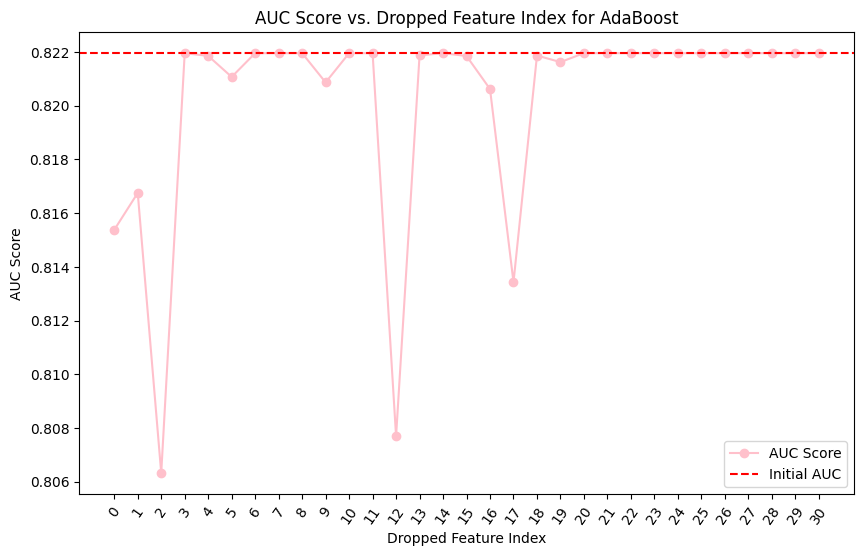

In [ ]:
# @title
initial_auc = auc_score
plt.figure(figsize=(10, 6))
indices = list(range(len(auc_scores)))
plt.plot(indices, auc_scores, marker='o', linestyle='-', color='pink', label='AUC Score')
plt.axhline(y=initial_auc, color='red', linestyle='--', linewidth=1.5, label='Initial AUC')
plt.xticks(indices)
plt.xticks(rotation=55)
plt.xlabel("Dropped Feature Index")
plt.ylabel("AUC Score")
plt.title("AUC Score vs. Dropped Feature Index for AdaBoost")
plt.legend()
plt.show()